## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/PhD_MasterDataset_OT_initial.csv')
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_091222_S1-6.csv',t_baseline=25)

C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (specName,massFrac) in self.massFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:97: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name,val) in self.volFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (specName,massFrac) in self.massFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:97: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name,val) in self.volFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\for

## Analyse water addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=3)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=252s and ended at t=672s; mass=50.214749999999995g
This equals a volume of 50.315m; expected was 48.594mL; error is 3.543%


## Analyise surfactants

<IPython.core.display.Javascript object>


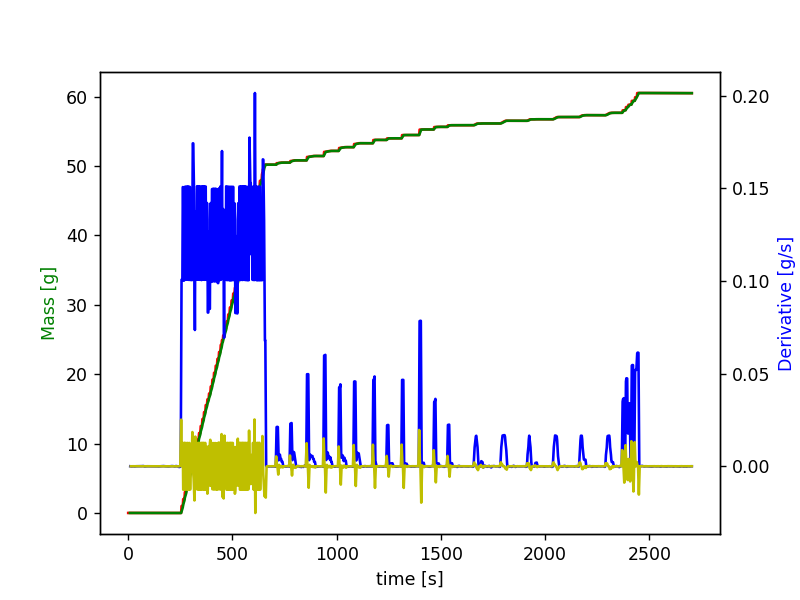

Addition of 0.297g Texapon SB 3 KC detected from 706s to 748s - expected volume = 0.593mL and actual volume = 0.267mL (resulting error is 55.0%)
Addition of 0.322g Texapon SB 3 KC detected from 772s to 810s - expected volume = 0.593mL and actual volume = 0.289mL (resulting error is 51.227%)
Addition of 0.636g Plantapon ACG 50 detected from 852s to 904s - expected volume = 0.635mL and actual volume = 0.56mL (resulting error is 11.722%)
Addition of 0.736g Plantapon ACG 50 detected from 934s to 984s - expected volume = 0.635mL and actual volume = 0.649mL (resulting error is 2.278%)
Addition of 0.543g Plantacare 2000 detected from 1006s to 1052s - expected volume = 0.497mL and actual volume = 0.499mL (resulting error is 0.481%)
Addition of 0.57g Plantacare 2000 detected from 1078s to 1120s - expected volume = 0.497mL and actual volume = 0.524mL (resulting error is 5.519%)
Addition of 0.483g Dehyton MC detected from 1170s to 1196s - expected volume = 0.586mL and actual volume = 0.442mL (res

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=5, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

<IPython.core.display.Javascript object>


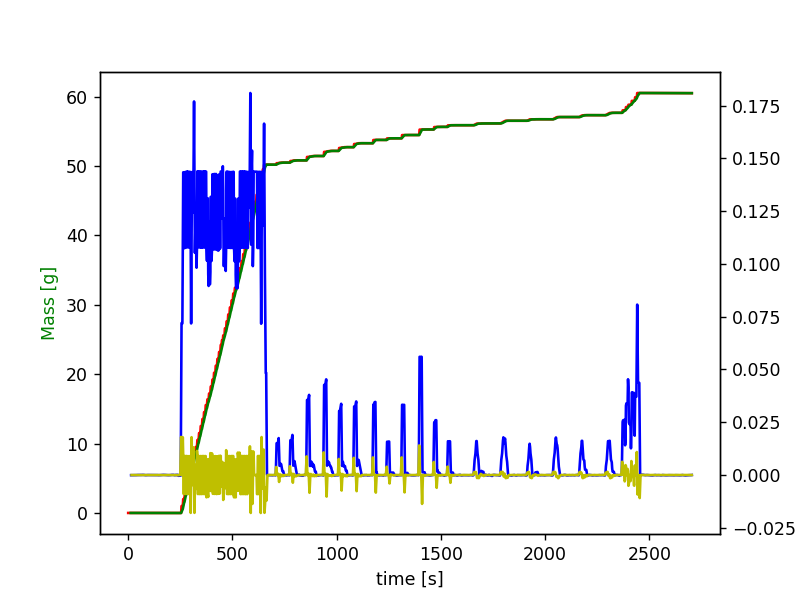

Addition of 0.265g Luviquat Excellence detected from 1654s to 1714s - expected volume = 0.39mL and actual volume = 0.24mL (resulting error is 38.472%)
Addition of 0.391g Luviquat Excellence detected from 1744s to 1828s - expected volume = 0.39mL and actual volume = 0.355mL (resulting error is 9.037%)
Addition of 0.205g Luviquat Excellence detected from 1910s to 1944s - expected volume = 0.413mL and actual volume = 0.184mL (resulting error is 55.481%)
Addition of 0.018g Luviquat Excellence detected from 1948s to 1972s - expected volume = 0.413mL and actual volume = 0.016mL (resulting error is 96.04%)
Addition of 0.322g Luviquat Excellence detected from 2034s to 2076s - expected volume = 0.271mL and actual volume = 0.291mL (resulting error is 7.357%)
Addition of 0.28g Luviquat Excellence detected from 2160s to 2206s - expected volume = 0.271mL and actual volume = 0.253mL (resulting error is 6.714%)


In [4]:
t3 = massProfile.analyseIngredients(avg_window=7, bl_mult=6, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

<IPython.core.display.Javascript object>


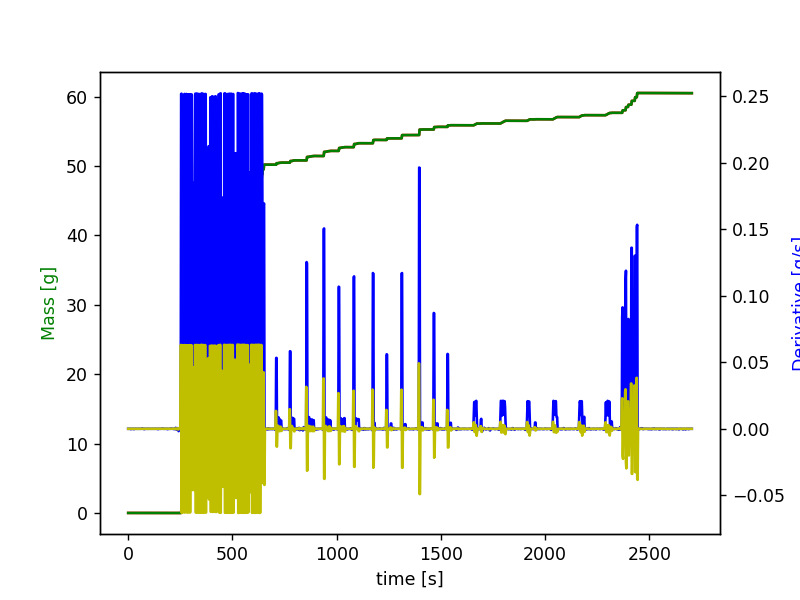

Addition of 0.328g Arlypon TT detected from 2286s to 2316s - expected volume = 0.491mL and actual volume = 0.343mL (resulting error is 30.106%)
Addition of 0.022g Arlypon TT detected from 2316s to 2326s - expected volume = 0.491mL and actual volume = 0.023mL (resulting error is 95.319%)
Addition of 0.364g Arlypon TT detected from 2366s to 2380s - expected volume = 0.456mL and actual volume = 0.376mL (resulting error is 17.386%)
Addition of 0.471g Arlypon TT detected from 2382s to 2396s - expected volume = 0.456mL and actual volume = 0.488mL (resulting error is 7.159%)
Addition of 0.337g Arlypon TT detected from 2396s to 2410s - expected volume = 0.396mL and actual volume = 0.352mL (resulting error is 11.184%)
Addition of 0.545g Arlypon TT detected from 2410s to 2422s - expected volume = 0.396mL and actual volume = 0.568mL (resulting error is 43.421%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=7, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/AnalaysedComposition_091222_S1-6.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_15156\1502542791.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
42,43.0,3.133817,0.000000,0.0,0.0,5.725283,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,2.791644,0.0,0.0,0.0,0.0,3.466191
43,44.0,3.442990,0.000000,0.0,0.0,6.094487,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,4.183600,0.0,0.0,0.0,0.0,0.235308
44,45.0,0.000000,0.000000,0.0,0.0,0.000000,5.204570,0.0,0.0,0.0,0.000000,0.0,4.074595,2.208041,0.0,0.0,0.0,0.0,3.919331
45,46.0,0.000000,0.000000,0.0,0.0,0.000000,2.676452,0.0,0.0,0.0,0.000000,0.0,2.712774,0.206742,0.0,0.0,0.0,0.0,5.351769
46,47.0,0.000000,6.214003,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,4.674189,0.0,0.000000,3.148762,0.0,0.0,0.0,0.0,3.299600
47,48.0,0.000000,6.807364,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,7.406382,0.0,0.000000,2.587031,0.0,0.0,0.0,0.0,5.038041
